In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from io import BytesIO
from matplotlib import pyplot as plt
from scipy.stats import linregress

## Methods

In [2]:
x_column = '$z_0$'
y_column = r'$\ln(I(z_0))$'

In [3]:
def read_vert_file(path) -> pd.DataFrame:
    """
    Read a *.VERT file from the given path.

    1. Read the file and create a list of lines, which are seperated by \r\n
    2. Extract the Title field
    3. Extract the data: Starting 2 lines after a line named "DATA"
    4. Convert data into DataFrame
    """
    # read
    with open(path, 'rb') as io:
        txt = io.read()
    txt = txt.split(b'\r\n')

    # extract title
    for line in txt:
        if line.startswith(b'Titel'):
            title = line.split(b'=')[1]
            break

    # extract data
    for index, line in enumerate(txt):
        if b'\nDATA' in line:
            data = txt[index+2:] # data start 2 lines after the found line
            break
    
    # convert to df
    with BytesIO(b'\n'.join(data)) as io:
        df = pd.read_csv(io, sep='\t', index_col=0, header=None)

    df.attrs['title'] = os.path.basename(path)
    df = df.drop(columns=4)
    df = df.rename(columns={
        1: 'X',
        2: x_column,
        3: 'Z'
    })
    df[y_column] = np.log(df.Z)

    return df

In [4]:
def plot(data, title=None, filename=None):
    data = data.copy()
    img = sns.relplot(
        data=data,
        x=x_column,
        y=y_column
    )
    if title is not None:
        plt.title(title)
    else:
        plt.title(df.attrs['title'])
    if filename is not None:
        img.figure.savefig(filename, bbox_inches='tight')

In [5]:
def read_files(folder):
    data = {}
    for dirpath, dirnames, filenames in os.walk(folder):
        for f in filenames:
            filename = f"{dirpath}/{f}"
            print('read file: ', filename)
            df = read_vert_file(filename)
            data[df.attrs['title']] = df
    return data

# A

In [6]:
data = read_files('a')

read file:  a/A231128.133315.VERT
read file:  a/A231128.133424.VERT
read file:  a/A231128.134137.VERT
read file:  a/A231128.134156.VERT
read file:  a/A231128.134230.VERT
read file:  a/A231128.134345.VERT
read file:  a/A231128.134401.VERT
read file:  a/A231128.134418.VERT
read file:  a/A231128.134446.VERT


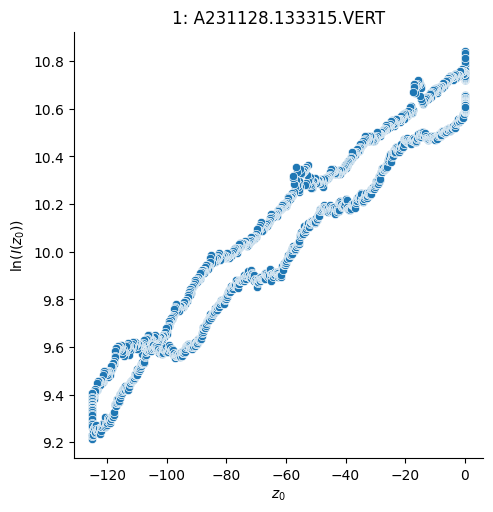

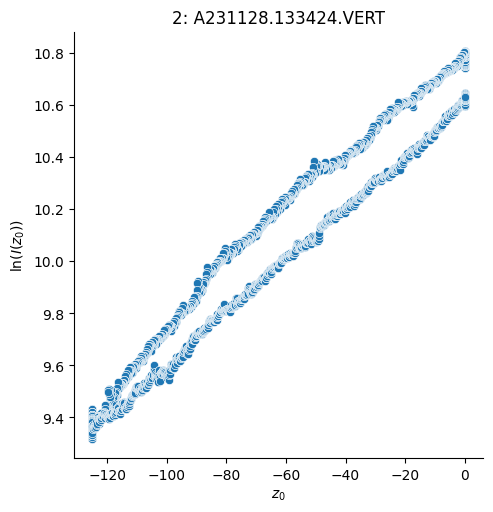

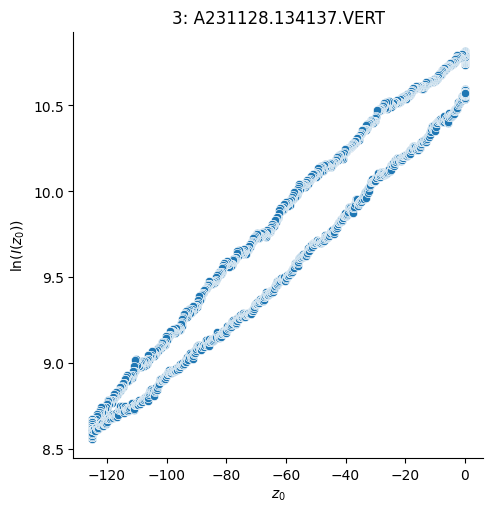

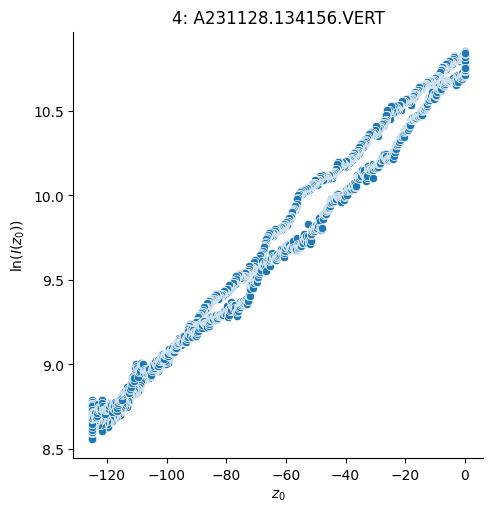

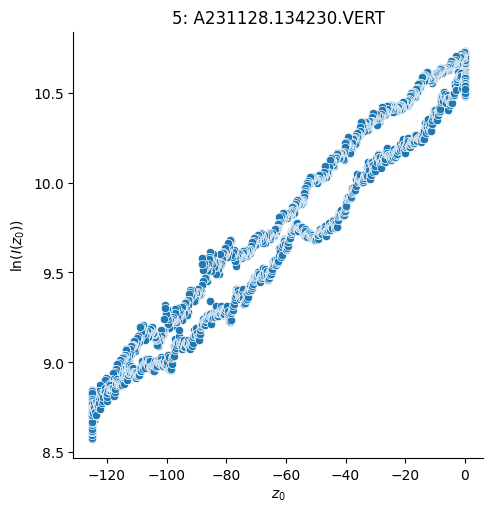

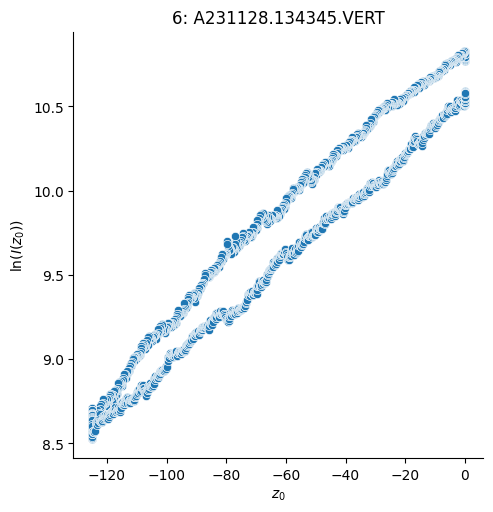

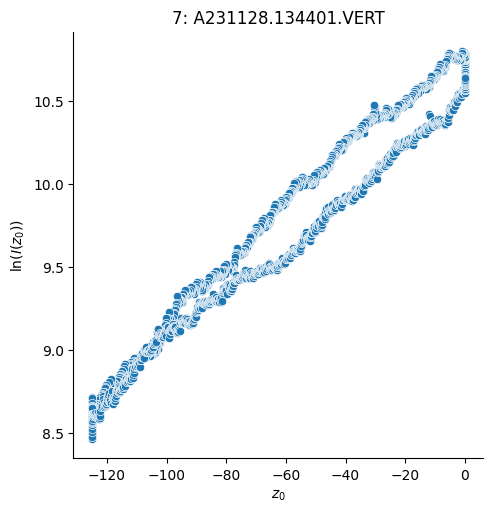

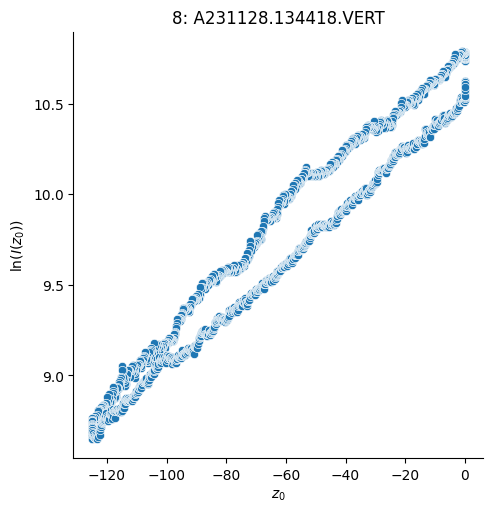

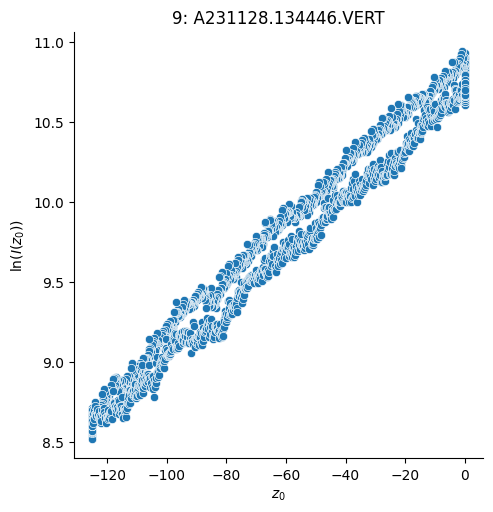

In [8]:
for i, key in enumerate(data.keys()):
    plot(data[key], title=f"{i+1}: {key}")

# B

In [10]:
data = read_files('b')

read file:  b/A231128.134613.VERT
read file:  b/A231128.134739.VERT
read file:  b/A231128.134817.VERT
read file:  b/A231128.134842.VERT
read file:  b/A231128.134923.VERT
read file:  b/A231128.134937.VERT
read file:  b/A231128.134951.VERT
read file:  b/A231128.135005.VERT
read file:  b/A231128.135041.VERT


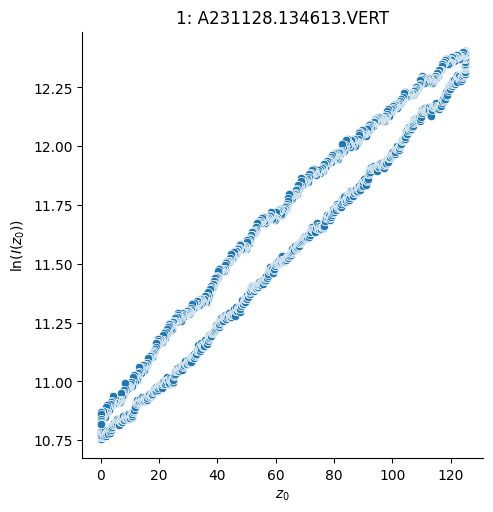

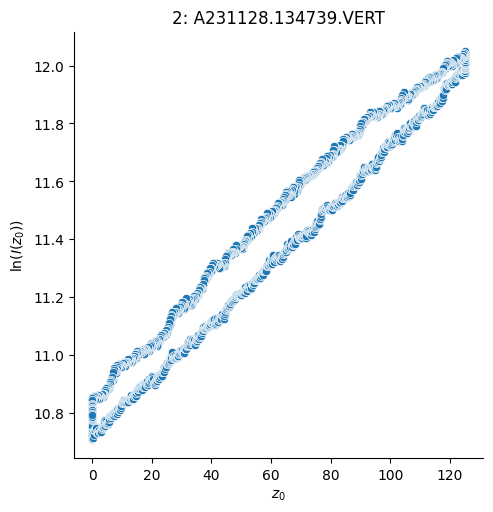

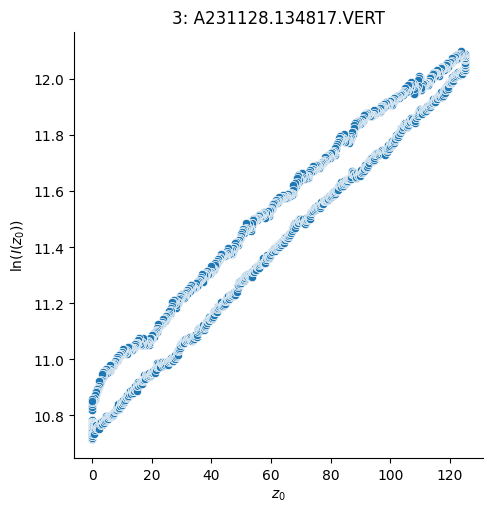

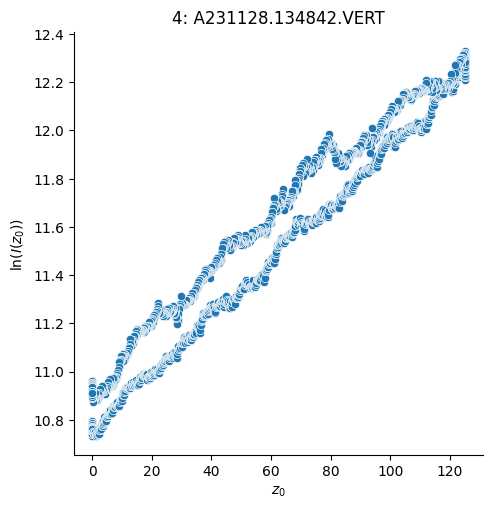

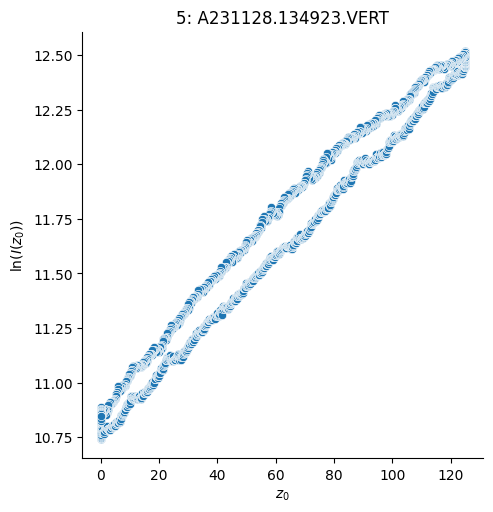

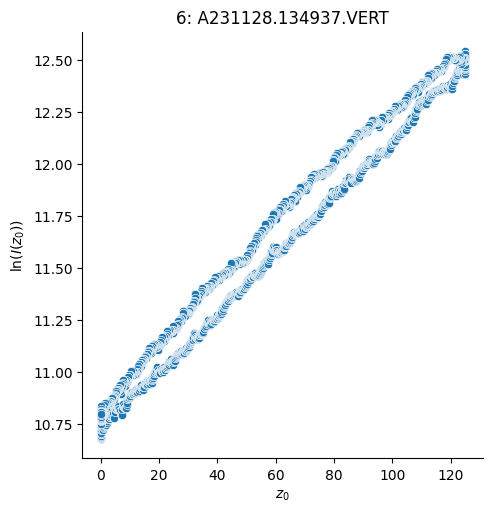

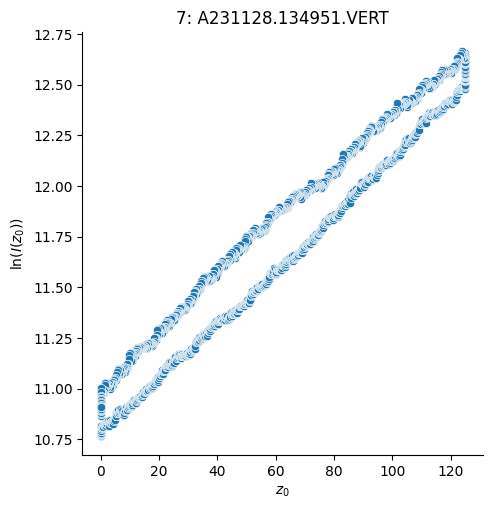

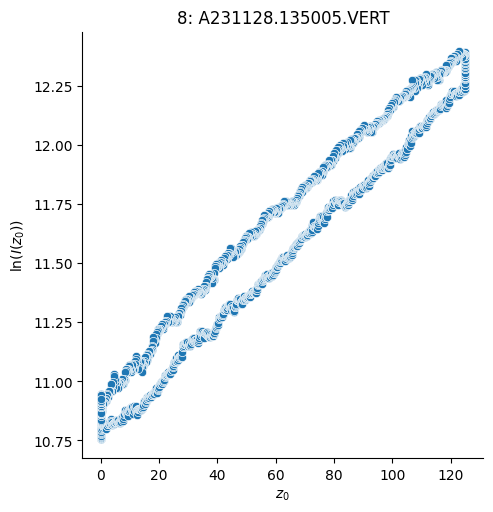

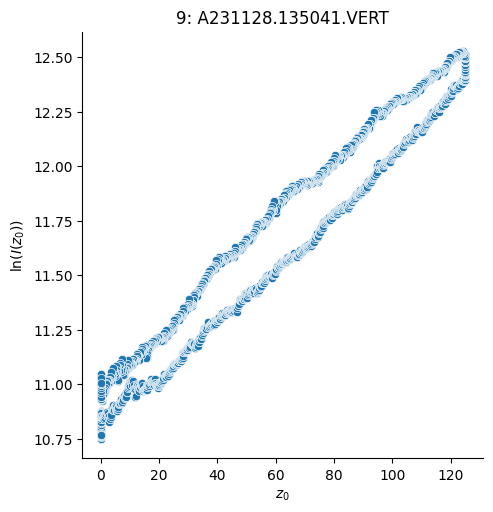

In [11]:
for i, key in enumerate(data.keys()):
    plot(data[key], title=f"{i+1}: {key}")